In [ ]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
%matplotlib inline
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
import scipy
import sklearn
import pandas as pd
import base64
import wave
from wave import open as open_wave

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#AJ's Voice Samples
AJ_audio = "/content/drive/MyDrive/Upwork/audioathuntication/AJ"
audio_list1 = librosa.util.find_files(AJ_audio, ext=['wav']) 
#Imposter'ss Voice Samples
imposter_Audio = "/content/drive/MyDrive/Upwork/audioathuntication/Imposter"
audio_list2 = librosa.util.find_files(imposter_Audio, ext=['wav'])

In [ ]:
data=np.zeros([80,21]);
featuredf  = pd.DataFrame(data, columns = ['User', 'Average', 'std', 'zcr', 'centroid', 'rollof', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14','label'])
featuredf.iloc[0:40,0]='AJ';
featuredf.iloc[40:80,0]='Imposter';
featuredf.iloc[0:40,-1]=1;
featuredf.iloc[40:80,-1]=0;
featuredf.head()

,User,Average,std,zcr,centroid,rollof,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,label
0,AJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,AJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,AJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,AJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,AJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#AJ's sampling rate
AJ1 = "/content/drive/MyDrive/Upwork/audioathuntication/AJ/AJ (1).wav"
x, sr = librosa.load(AJ1)
ipd.Audio(x, rate=sr)
sr

22050

In [ ]:
#Imposter's sampling rate
Imposter1 = "/content/drive/MyDrive/Upwork/audioathuntication/Imposter/Imposter (1).wav"
x1, sr1 = librosa.load(Imposter1)
ipd.Audio(x1, rate=sr1)
sr1

22050

In [ ]:
def normalize(x1, axis=0):
    return sklearn.preprocessing.minmax_scale(x1, axis=axis)

# Imposter - Feature Extraction

In [ ]:
#Imposter - Zooming in
ind=40;
for audio in audio_list2:
    data,sample_rate=librosa.load(audio)
    featuredf.iloc[ind,1]=np.mean(data)
    featuredf.iloc[ind,2]=np.std(data)  
    zero_crossings = librosa.zero_crossings(data, pad=False)
    spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr1)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr1)[0]
    mfccs = librosa.feature.mfcc(data, sr=sr1,n_mfcc=14)
#Spectral Centroid
    featuredf.iloc[ind,4]=np.mean(normalize(spectral_centroids))
#Zero Crossings
    featuredf.iloc[ind,3]=sum(zero_crossings)
#Spectral Rolloff
    featuredf.iloc[ind,5]=np.mean(normalize(spectral_rolloff))
#mfcc
    featuredf.iloc[ind,6:20]=np.mean(mfccs,1)
    ind=ind+1;

# AJ - Feature Extraction

In [ ]:
# AJ - Zooming in
ind=0;
for audio1 in audio_list1:
    data1,sample_rate1=librosa.load(audio1)
    zero_crossings1 = librosa.zero_crossings(data1, pad=False) 
    spectral_centroids1 = librosa.feature.spectral_centroid(data1, sr=sr)[0]
    spectral_rolloff1 = librosa.feature.spectral_rolloff(data1+0.01, sr=sr)[0]
    mfccs1 = librosa.feature.mfcc(data1, sr=sr,n_mfcc=14)
    featuredf.iloc[ind,1]=np.mean(data1)
    featuredf.iloc[ind,2]=np.std(data1)
#Spectral Centroid
    featuredf.iloc[ind,4]=np.mean(normalize(spectral_centroids1))
#Zero Crossings
    featuredf.iloc[ind,3]=sum(zero_crossings1)
#Spectral Rolloff
    featuredf.iloc[ind,5]=np.mean(normalize(spectral_rolloff1))
#mfcc
    featuredf.iloc[ind,6:20]=np.mean(mfccs1,1)
    ind=ind+1;

In [ ]:
featuredf.head()

,User,Average,std,zcr,centroid,rollof,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,label
0,AJ,0.000175,0.067028,1505.0,0.079878,0.142516,-425.435364,110.639725,33.098763,12.889438,-1.837232,-0.445507,-2.246605,-6.107216,-2.528062,-0.248629,-12.453880,-3.595620,-4.926505,-4.446347,1.0
1,AJ,-0.000013,0.063730,1514.0,0.448148,0.242459,-418.229279,121.052032,18.744495,21.076342,8.956787,-0.267981,-16.453539,-7.144414,-3.149678,0.042572,-12.427893,-6.400948,-2.374579,-4.743773,1.0
2,AJ,0.000019,0.050663,3986.0,0.323284,0.390214,-430.028107,93.152382,27.714996,27.186514,10.140581,6.420453,-4.152555,10.403549,-1.266430,6.145259,-7.084801,-1.031853,1.062626,-1.968950,1.0
3,AJ,0.000058,0.059020,1668.0,0.326165,0.350424,-369.942169,104.334633,24.363705,26.232740,6.363106,4.713255,-16.766659,5.110753,-6.248245,7.379821,-13.206908,-0.928696,-4.179599,-8.380135,1.0
4,AJ,0.000028,0.043197,2000.0,0.142124,0.384404,-430.498810,90.099716,30.317093,33.402557,9.031054,9.912164,-12.696789,2.966057,-2.904612,10.308959,-12.165601,2.361983,-2.579911,-5.428612,1.0


In [ ]:
featuredf.to_csv("/content/drive/MyDrive/Upwork/audioathuntication/Features3.csv", header=True, index=False)  

# Classification
we have 19 features for  classification i.e avg.std,spectral rollof ,spectral centroid and 14 MFCCs. since  we had 80 data samples  40 authentic and 40 imposter, the size of feature matrix is 80*19 .For classification we will use 80% of dat for traning and 20% data for teting ,both  traning abd testing data sample will  be choosen randomly.
<br> we will use  log regression,SVM ,KNN,Naivebayes and Decisiontre classifier to asscess  feature matrix and classification result

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
# Keras specific
import keras
from sklearn.linear_model import LogisticRegression;
from sklearn.metrics import classification_report;
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:



y=featuredf.label  # extract labels from dataframe
x=featuredf.drop(['label','User'],axis=1)   # extract  all feature from dataframe by removing rest of data 
print(x.shape)
print(y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) #split the  feature in test and traing set (80% traning data 20% testing data)
scaler = StandardScaler()  # normalize data for fast cobergence
scaler.fit(x_train)  

x_train = scaler.transform(x_train)  #normalize traning data
x_test = scaler.transform(x_test)  #normalize testing data
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(80, 19)
(80,)
(64, 19) (64,)
(16, 19) (16,)


##logregression
Eventhough, the name ‘Regression’ comes up, it is not a regression model, but a classification model. It uses a logistic function to frame binary output model. The output of the logistic regression will be a probability (0≤x≤1), and can be used to predict the binary 0 or 1 as the output ( if x<0.5, output= 0, else output=1).


Test confusion_matrix
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

ACC:1.000
AUC:1.000


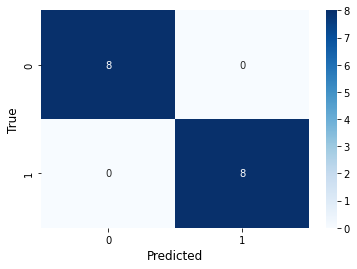

In [ ]:
logreg = LogisticRegression();   # create classfier
logreg.fit(x_train,y_train);     # tain classifieer
y_pred = logreg.predict(x_test);  # test calssifer
cf_matrix = confusion_matrix(y_test, y_pred);   # calculte confusion matrix
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')   # plot confusion matrix
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
print(classification_report(y_test, y_pred))    # print classification repost with ACC prcision recal and F1 scores
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))   # test ing accuracy
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))    # area under the curve score

##SVM
Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well 

ACC:1.000
AUC:1.000

Test confusion_matrix
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



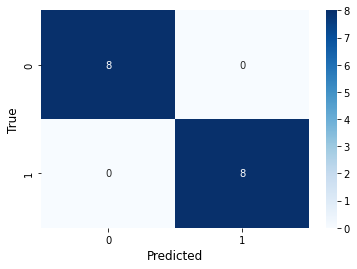

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeavePGroupsOut
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
####SVm with linear
###C list as [1,10]
###leave 4 groups out
clSvm = SVC(kernel = 'linear')   # sVM with leniear kernal
p = {'kernel':('linear',), 'C':[0.001,0.1,1,10]}
clSvm= GridSearchCV(clSvm, p,cv = KFold(4))  # kfold cross valdation  4 folds 
clSvm.fit(x_train, y_train )
y_pred = clSvm.predict(x_test)
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))

cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
print(classification_report(y_test, y_pred))

## Naivebayes
Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.


Test confusion_matrix
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         8
         1.0       0.80      1.00      0.89         8

    accuracy                           0.88        16
   macro avg       0.90      0.88      0.87        16
weighted avg       0.90      0.88      0.87        16

ACC:0.875
AUC:0.875


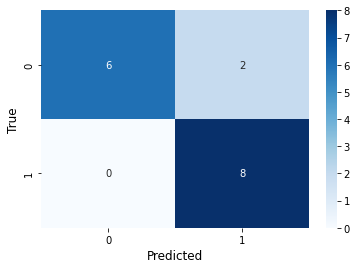

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)


cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

print(classification_report(y_test, y_pred))
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))

##Decision  tree
Decision tree is derived from the independent variables, with each node having a condition over a feature.The nodes decides which node to navigate next based on the condition. Once the leaf node is reached, an output is predicted. The right sequence of conditions makes the tree efficient. entropy/Information gain are used as the criteria to select the conditions in nodes. A recursive, greedy based algorithm is used to derive the tree structure.


Test confusion_matrix
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

ACC:1.000
AUC:1.000


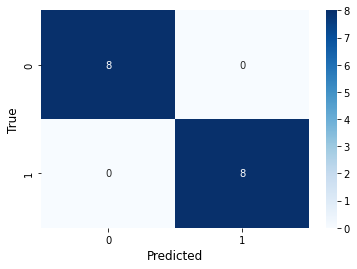

In [ ]:
from sklearn.tree import DecisionTreeClassifier;
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)

cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

print(classification_report(y_test, y_pred))
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))

##KNN
The basic logic behind KNN is to explore your neighborhood, assume the test datapoint to be similar to them and derive the output. In KNN, we look for k neighbors and come up with the prediction.


Test confusion_matrix
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       1.00      0.88      0.93         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16

ACC:0.938
AUC:0.938


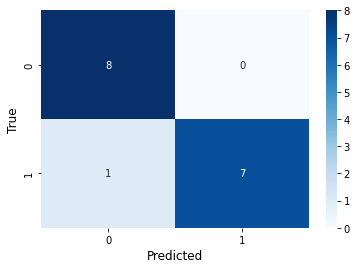

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier(n_neighbors=5)  ##knn with 5 nearest neigbours
knnclf.fit(x_train, y_train)   
y_pred = knnclf.predict(x_test)

cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

print(classification_report(y_test, y_pred))
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))